<a href="https://colab.research.google.com/github/SebasCrucer/titanic-dataset/blob/master/titatic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVITY II
## Data Cleaning

- Professor: José Escorcia Gutierrez, Ph.D.
- Student: Diego Sebastian Cruz Cervantes


In [ ]:
import pandas as pd

titanic = pd.read_csv("./Titanic.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Drop "PassengerId", "Name", "Ticket", "Cabin" variables because they do not provide usefull information or there are too many nulls or too many categories.

In [ ]:
titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Didn't delete outliers. In this case they provide usefull information.

<Axes: >

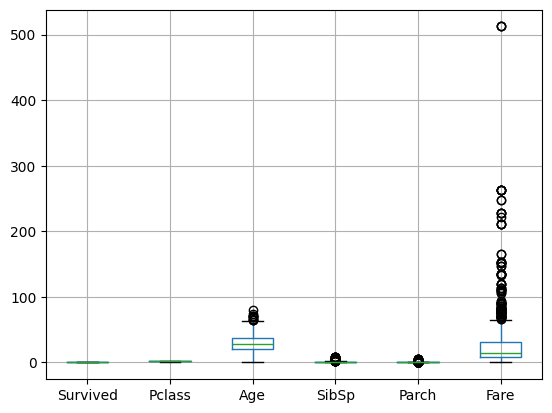

In [ ]:
titanic.boxplot()

Heatmap before ONEHOT Encoding

<Axes: >

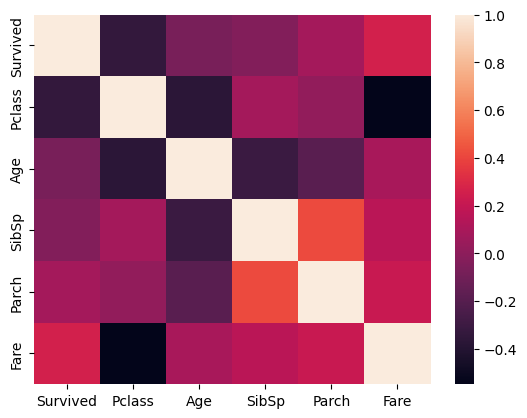

In [ ]:
import seaborn as sns

sns.heatmap(titanic.corr(numeric_only=True))

In [ ]:
onehot_titanic = titanic.copy()
onehot_titanic = pd.get_dummies(onehot_titanic, columns=["Sex", "Embarked"])
onehot_titanic['Sex'] = titanic['Sex']
onehot_titanic['Embarked'] = titanic['Embarked']

onehot_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Sex,Embarked
0,0,3,22.0,1,0,7.2500,False,True,False,False,True,male,S
1,1,1,38.0,1,0,71.2833,True,False,True,False,False,female,C
2,1,3,26.0,0,0,7.9250,True,False,False,False,True,female,S
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,female,S
4,0,3,35.0,0,0,8.0500,False,True,False,False,True,male,S


In [ ]:
onehot_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
 11  Sex         891 non-null    object 
 12  Embarked    889 non-null    object 
dtypes: bool(5), float64(2), int64(4), object(2)
memory usage: 60.2+ KB


Heat map after ONEHOT Encoding

<Axes: >

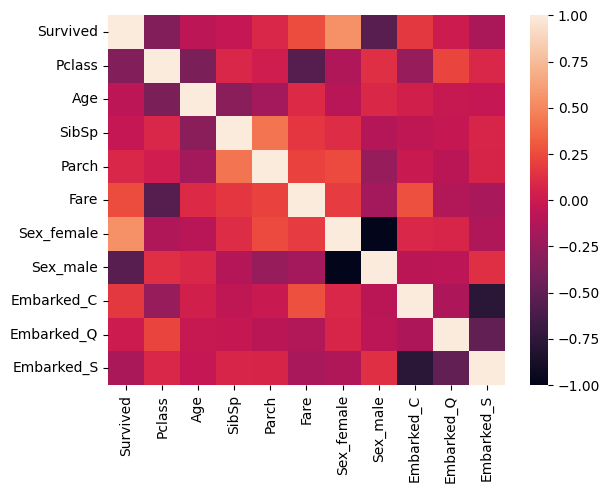

In [ ]:
sns.heatmap(onehot_titanic.corr(numeric_only=True))

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

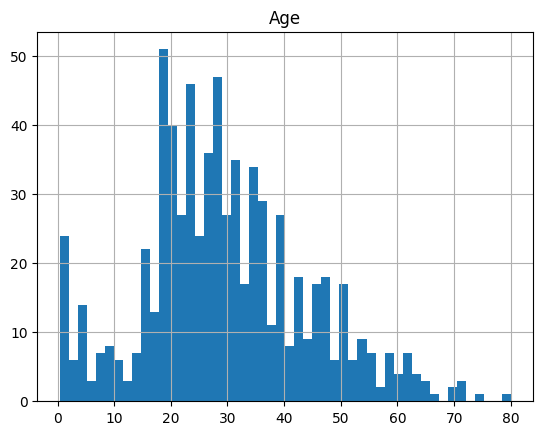

In [ ]:
onehot_titanic.hist(column="Age", bins=50)

### Imputation of Age using Median

In [ ]:
imputated_titanic = onehot_titanic.copy()

median_age = onehot_titanic['Age'].mean()
imputated_titanic['Age'] = imputated_titanic['Age'].fillna(median_age)

In [ ]:
imputated_titanic.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0


Diferences in statistical metrics of age after imputation

In [ ]:
(imputated_titanic.describe()-onehot_titanic.describe())[["Age"]]

,Age
count,177.000000
mean,0.000000
std,-1.524482
min,0.000000
25%,1.875000
50%,1.699118
75%,-3.000000
max,0.000000


### Addition of age1, age2, age3 variables

<Axes: >

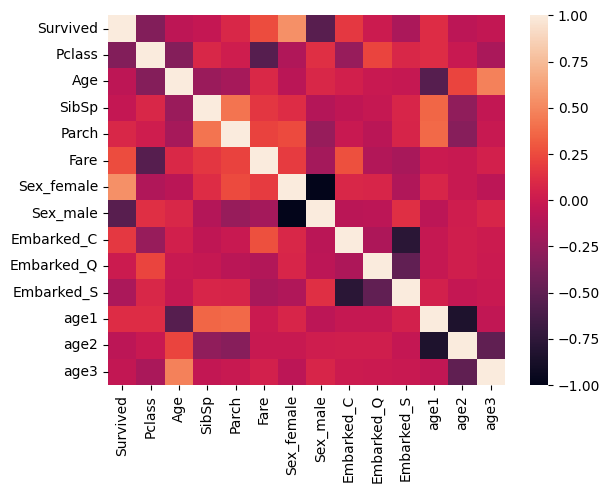

In [ ]:
enriched_titanic = imputated_titanic.copy()
enriched_titanic["age1"] = enriched_titanic["Age"] < 12
enriched_titanic["age2"] = (enriched_titanic["Age"] >= 12) & (enriched_titanic["Age"] < 60)
enriched_titanic["age3"] = enriched_titanic["Age"] >= 60
sns.heatmap(enriched_titanic.corr(numeric_only=True))

In [ ]:
processed_titanic = enriched_titanic.copy()

## EDA

In [ ]:
processed_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
 8   Embarked_C  891 non-null    bool   
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
 11  Sex         891 non-null    object 
 12  Embarked    889 non-null    object 
 13  age1        891 non-null    bool   
 14  age2        891 non-null    bool   
 15  age3        891 non-null    bool   
dtypes: bool(8), float64(2), int64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
processed_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived'>

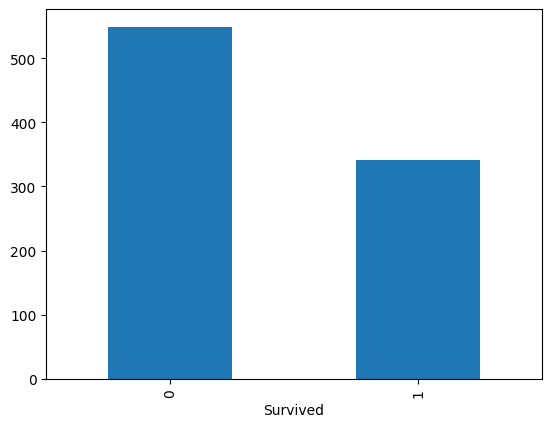

In [ ]:
processed_titanic['Survived'].value_counts().plot.bar()

<Axes: xlabel='Sex'>

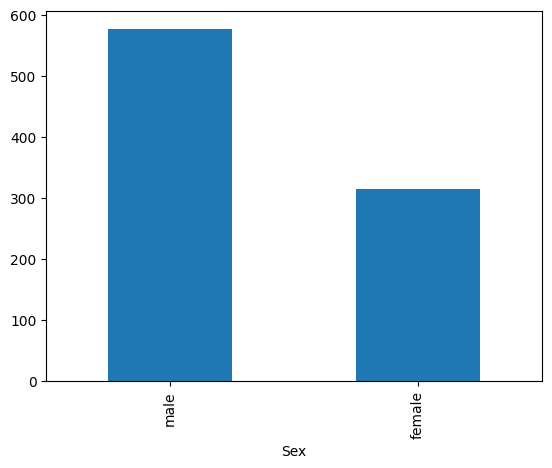

In [ ]:
processed_titanic['Sex'].value_counts().plot.bar()

<Axes: xlabel='Pclass'>

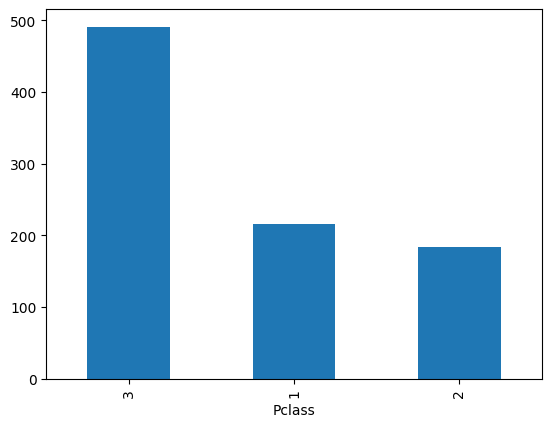

In [ ]:
processed_titanic['Pclass'].value_counts().plot.bar()

3rd class had the most passangers

<Axes: xlabel='Embarked'>

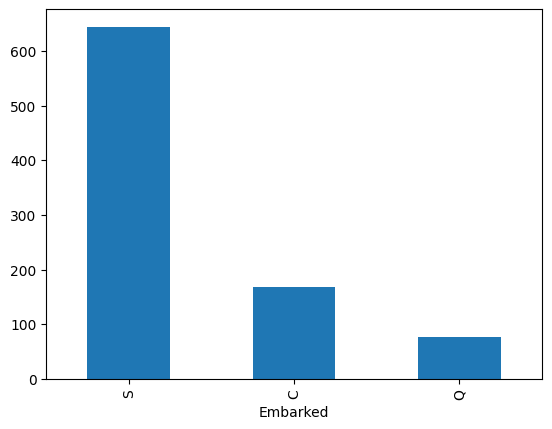

In [ ]:
processed_titanic['Embarked'].value_counts().plot.bar()

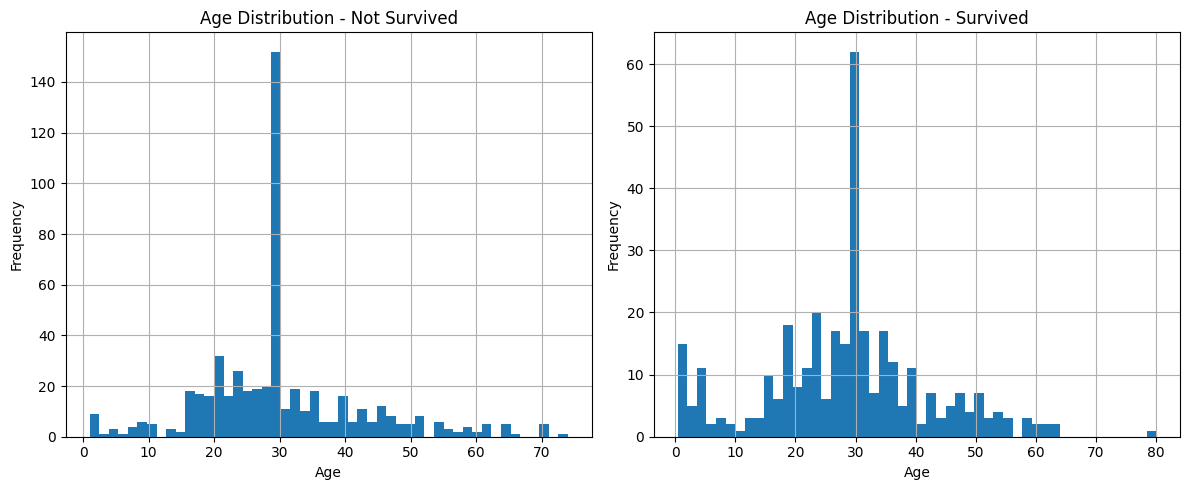

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

processed_titanic[processed_titanic['Survived'] == 0]['Age'].hist(bins=50, ax=axes[0])
axes[0].set_title('Age Distribution - Not Survived')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

processed_titanic[processed_titanic['Survived'] == 1]['Age'].hist(bins=50, ax=axes[1])
axes[1].set_title('Age Distribution - Survived')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can notice that children had more chances to survive and old people less chances

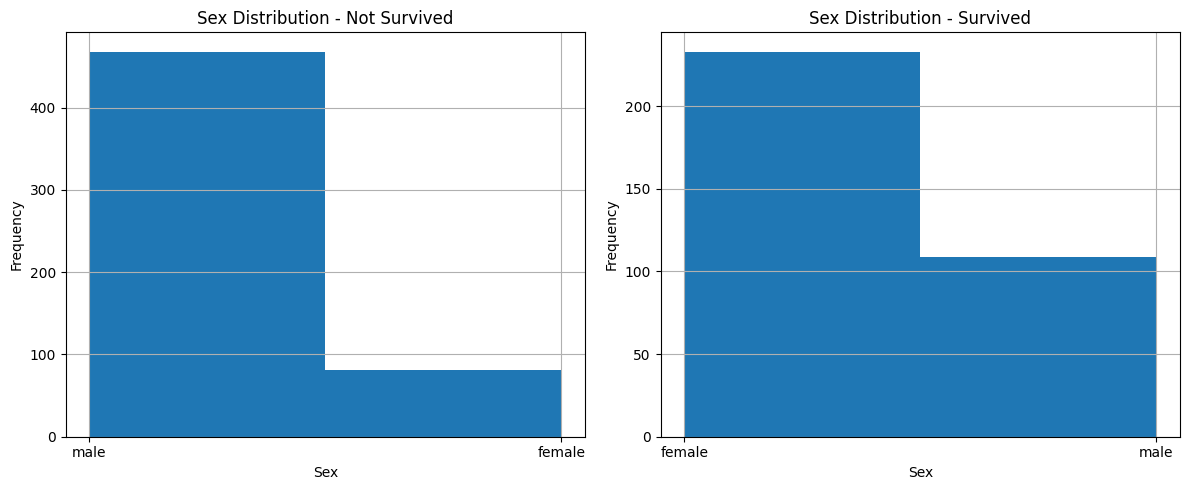

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

processed_titanic[processed_titanic['Survived'] == 0]['Sex'].hist(bins=2, ax=axes[0])
axes[0].set_title('Sex Distribution - Not Survived')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Frequency')

processed_titanic[processed_titanic['Survived'] == 1]['Sex'].hist(bins=2, ax=axes[1])
axes[1].set_title('Sex Distribution - Survived')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Here the diference is very clear. Males had less chances to survive than females. More men died, more women lived.

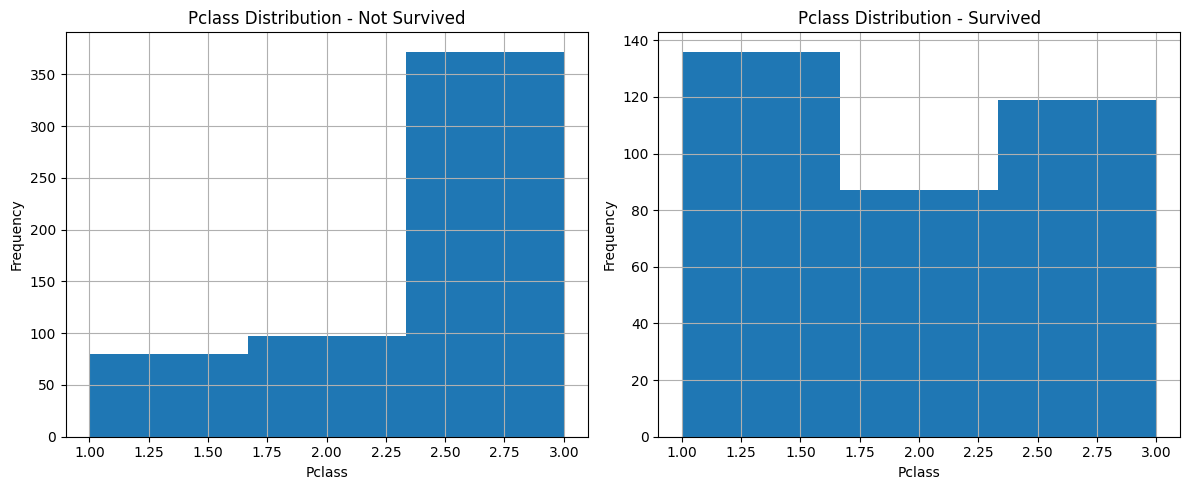

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

processed_titanic[processed_titanic['Survived'] == 0]['Pclass'].hist(bins=3, ax=axes[0])
axes[0].set_title('Pclass Distribution - Not Survived')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Frequency')

processed_titanic[processed_titanic['Survived'] == 1]['Pclass'].hist(bins=3, ax=axes[1])
axes[1].set_title('Pclass Distribution - Survived')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the victims were 3rd class. Most of the survivors were 1st class.

I'll show the % of survivors for each class

<Axes: xlabel='Pclass'>

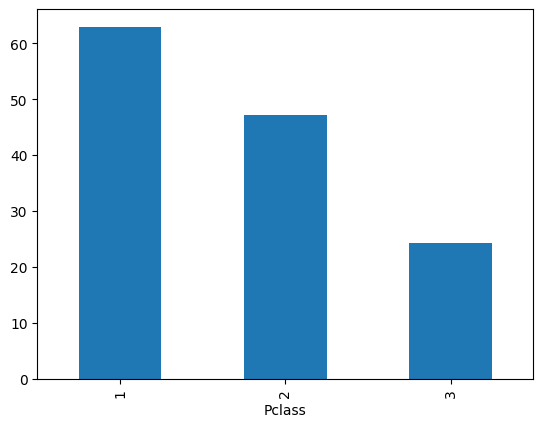

In [ ]:
(processed_titanic.groupby('Pclass')['Survived'].mean() * 100).plot.bar()

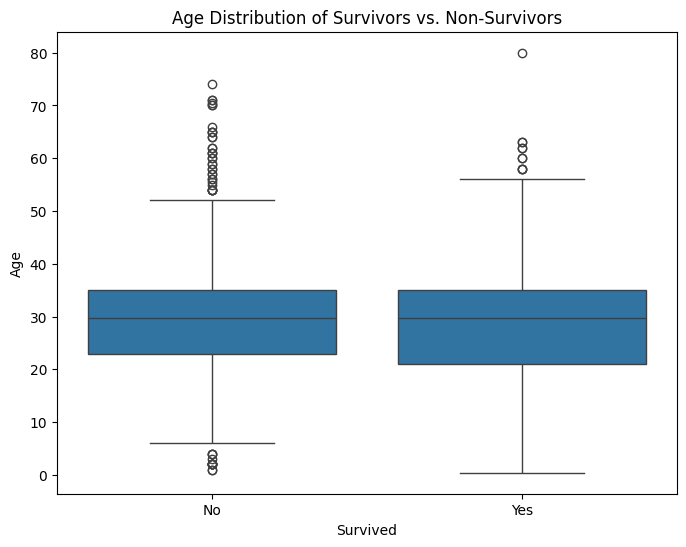

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=processed_titanic)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

There are less childrens in the no surviving gruop and more high age outliers

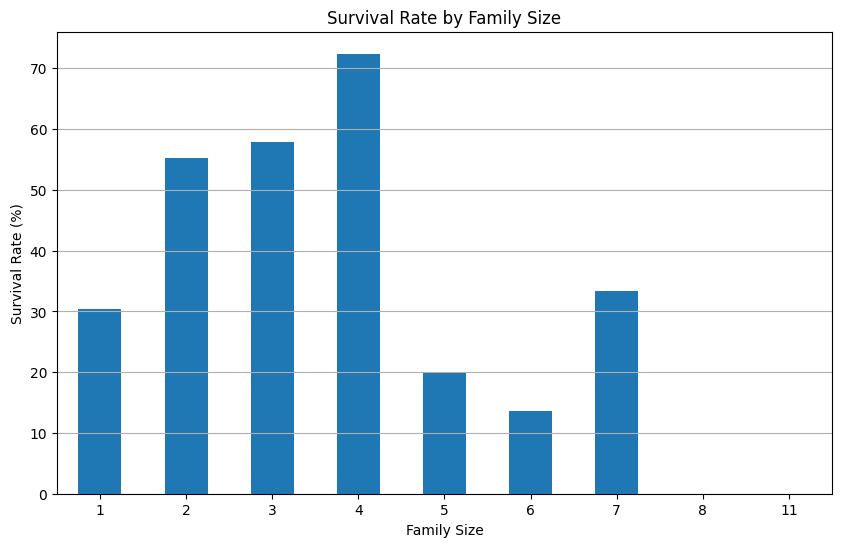

In [ ]:
processed_titanic['FamilySize'] = processed_titanic['SibSp'] + processed_titanic['Parch'] + 1

family_survival_rate = processed_titanic.groupby('FamilySize')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The chances of surviving increases with the size of the family with less than 5 members. With 5 or more there where less than 35% chances of surviving

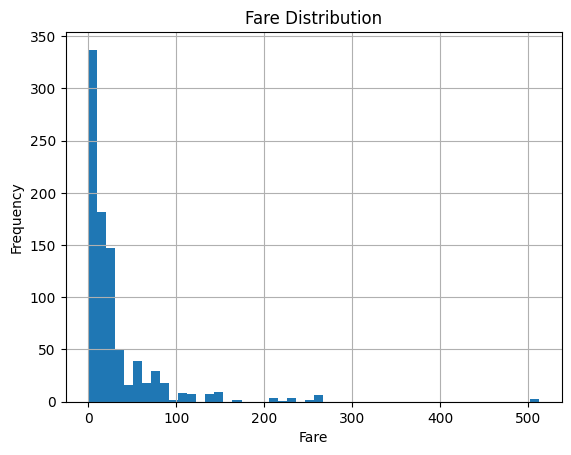

In [ ]:
processed_titanic['Fare'].hist(bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

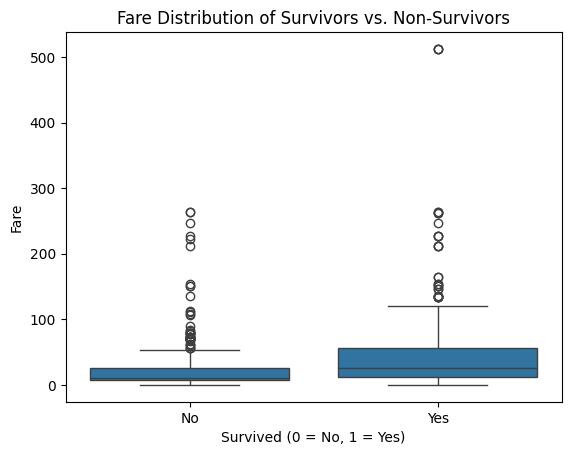

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=processed_titanic)
plt.title('Fare Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Survivors paid higher fares. In survivor's boxplot are less outliers, Q2 and Q3 are higher; and there is a high outlier. So higher fares help for surviving.

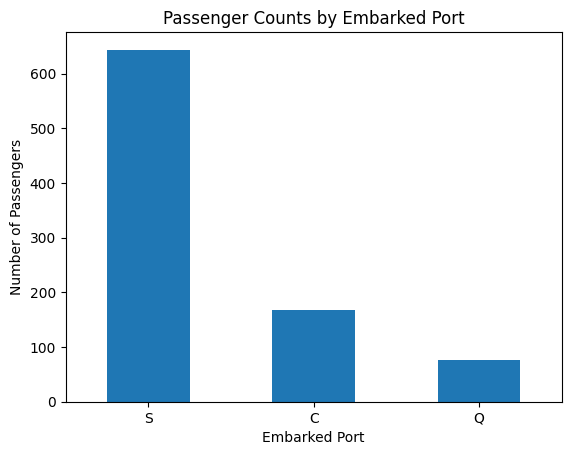

In [ ]:
processed_titanic['Embarked'].value_counts().plot(kind='bar')
plt.title('Passenger Counts by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

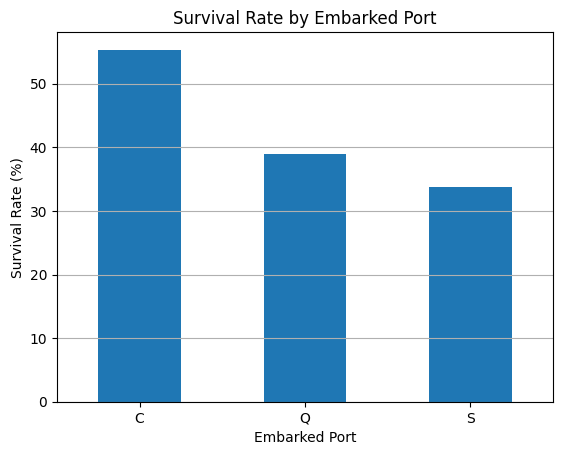

In [ ]:
embarked_survival_rate = processed_titanic.groupby('Embarked')['Survived'].mean() * 100
embarked_survival_rate.plot(kind='bar')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Port C have the gratest survival rate, followed by Q and then S

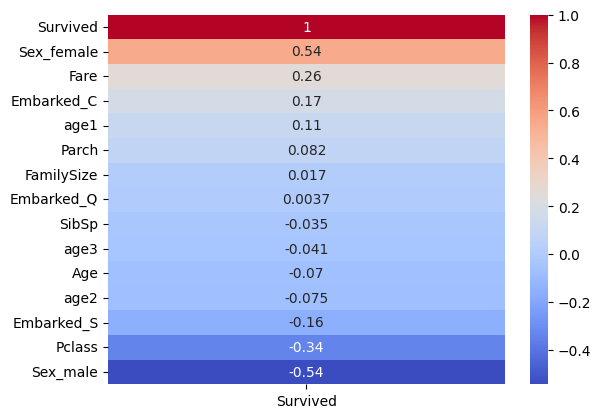

In [ ]:
sns.heatmap(processed_titanic.corr(numeric_only=True)[["Survived"]].sort_values(by="Survived", ascending=False), annot=True, cmap='coolwarm')
plt.show()

The 3 most correlated variables to survival are:
- Sex (male, female)
- Pclass
- Fare